In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("netflix.csv")



In [ ]:
df.info() #get overview of data types, non-null values etc
df.describe() #summary stats for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   show_id       8790 non-null   object         
 1   type          8790 non-null   object         
 2   title         8790 non-null   object         
 3   director      8790 non-null   object         
 4   country       8790 non-null   object         
 5   date_added    8790 non-null   object         
 6   release_year  8790 non-null   int64          
 7   rating        8790 non-null   object         
 8   duration      8790 non-null   timedelta64[ns]
 9   listed_in     8790 non-null   object         
 10  release_date  8790 non-null   datetime64[ns] 
 11  month         8790 non-null   int64          
dtypes: datetime64[ns](1), int64(2), object(8), timedelta64[ns](1)
memory usage: 824.2+ KB


,release_year,duration,month
count,8790.000000,8790,8790.000000
mean,2014.183163,69 days 22:25:38.293515358,6.655859
std,8.825466,50 days 19:03:59.025191250,3.436103
min,1925.000000,1 days 00:00:00,1.000000
25%,2013.000000,2 days 00:00:00,4.000000
50%,2017.000000,88 days 12:00:00,7.000000
75%,2019.000000,106 days 00:00:00,10.000000
max,2021.000000,312 days 00:00:00,12.000000


In [ ]:
# Display the first few rows of the dataset
print(df.head())



  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

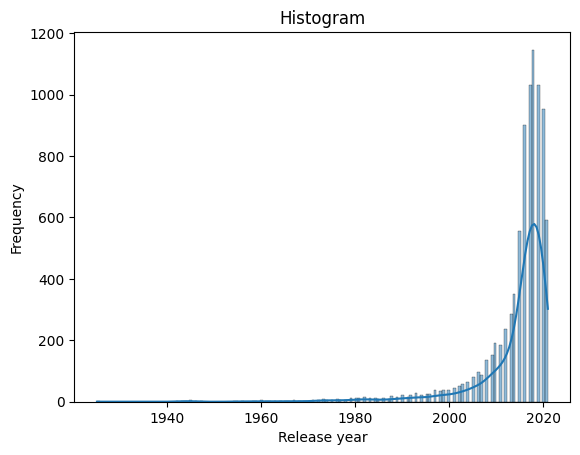

In [ ]:
# Create a histogram
sns.histplot(df['release_year'], kde=True)
plt.xlabel('Release year')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()



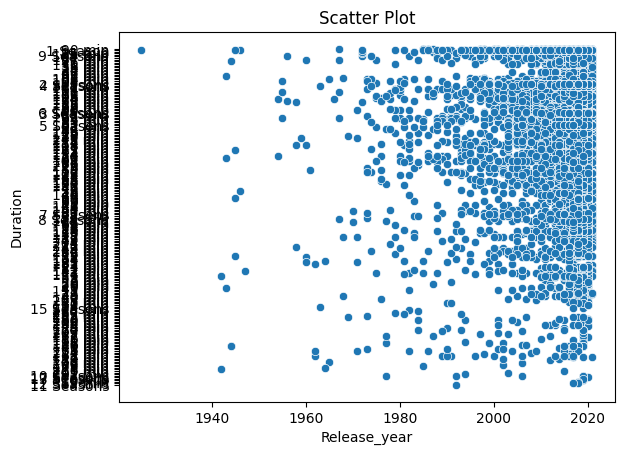

In [ ]:
# Create a scatter plot
sns.scatterplot(x='release_year', y='duration', data=df)
plt.xlabel('Release_year')
plt.ylabel('Duration')
plt.title('Scatter Plot')
plt.show()



(array([1173., 1697.,  973.,  894.,  497.,  397.,  272.,  104.,   56.,
          63.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

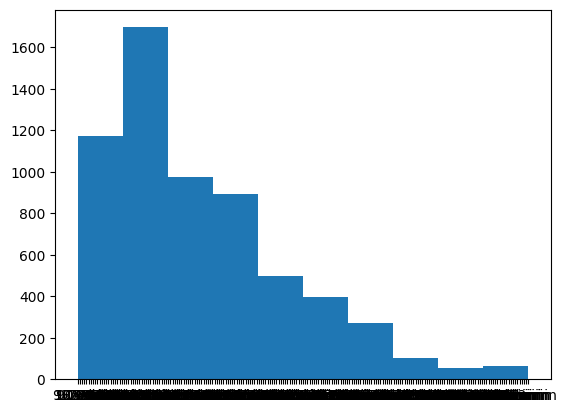

In [ ]:
#visualizing movie lengths distribution by plotting a histogram of the duration column

df_movies = df[df['type']=='Movie']
plt.hist(df_movies['duration'])


<Axes: xlabel='release_year'>

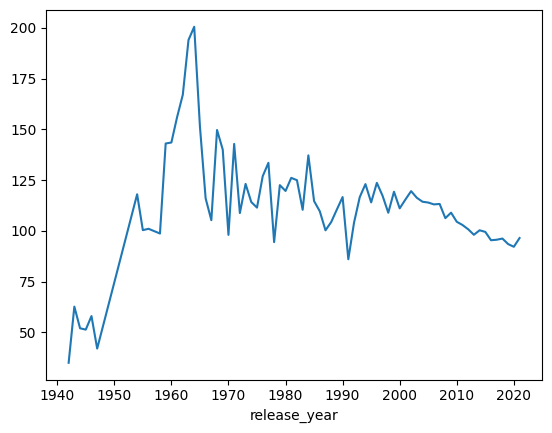

In [ ]:
"""Plotting the average duration over time by year to see if movie lengths have
changed"""

import re

df['duration'] = df['duration'].apply(lambda x: int(re.search(r'\d+', x).group()) if isinstance(x, str) else x)

df_movies = df[df['type']=='Movie']
df_movies = df_movies[df_movies['duration'].apply(lambda x: isinstance(x, int))]

from datetime import timedelta

df['duration'] = df['duration'].apply(timedelta)

df_movies.groupby('release_year')['duration'].mean().plot()

<Axes: xlabel='rating'>

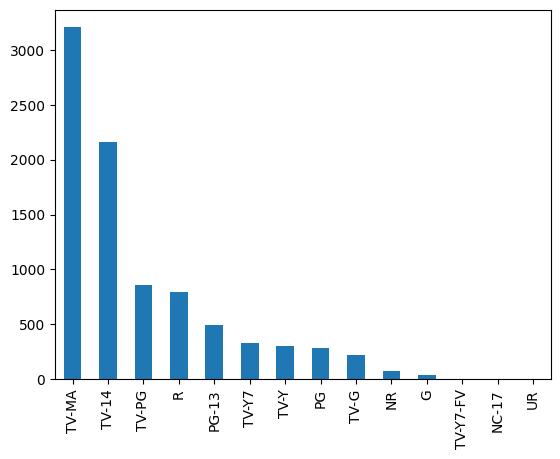

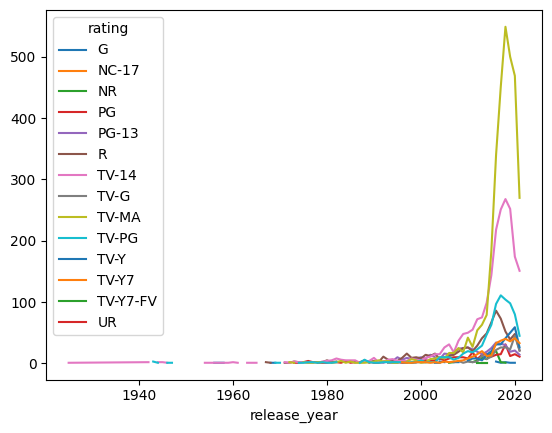

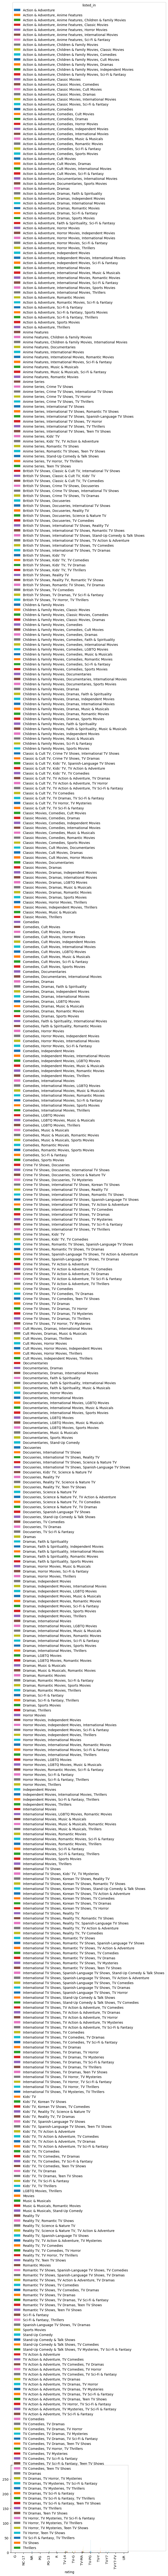

In [ ]:
"""Analyzing ratings:
Count/plot the frequency of each rating (G, PG, etc)
Check if average ratings change over time
See if certain genres have higher/lower ratings on average"""

df['rating'].value_counts().plot(kind='bar')

df.groupby('release_year')['rating'].value_counts().unstack().plot()

df.groupby('listed_in')['rating'].value_counts().unstack(0).plot(kind='bar')



<Axes: xlabel='type'>

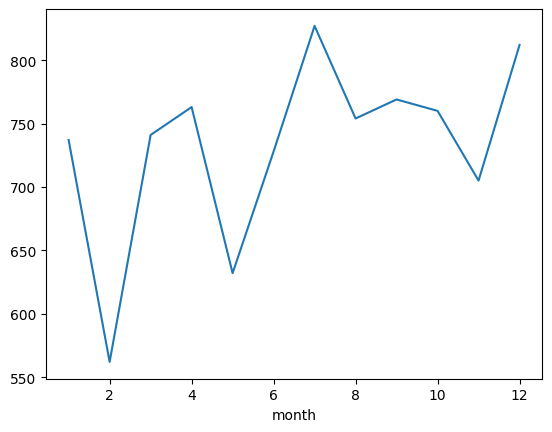

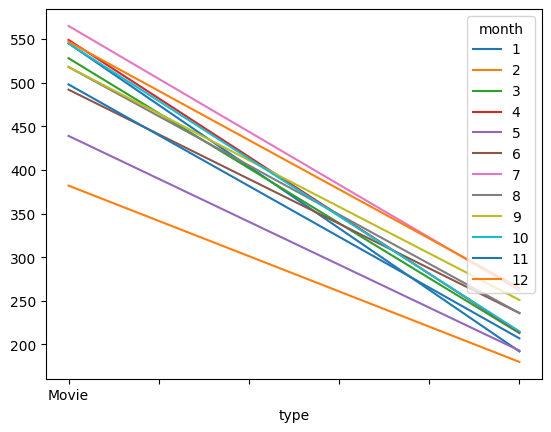

In [ ]:
"""Analyzing release dates:
Plot release frequency by month/day of week to see seasonal trends
Compare release frequency for movies vs TV shows"""

df['release_date'] = pd.to_datetime(df['date_added'])
df['month'] = df['release_date'].dt.month

df.groupby('month')['title'].count().plot()

df.groupby([df['type'], df['month']])['title'].count().unstack().plot()